<a href="https://colab.research.google.com/github/lasyaEd/DeepLearning/blob/main/Lab7_CNNarch_ledunuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  CNN Architectures

###  **DSBA 6165: AI & Deep Learning**


## Goal

The goal of this lab activity is practicing to build well-known convolutional neural network architectures and applying to an image classification problem. For this, we use Fashion MNIST dataset that contains 10 classes of images.

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling.

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets,Model
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

TF version: 2.18.0


## Loading Data

### Fashion MNIST
Fashion-MNIST is a dataset of [Zalando's article](https://github.com/zalandoresearch/fashion-mnist) images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example of how the data looks (each class takes three-rows):



<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width=700/>

Each training and test example is assigned to one of the following labels:

|Label |	Description |
|--|--|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Reference**

* Xiao, H., Rasul, K., & Vollgraf, R. (2017). Fashion-mnist: a novel image dataset for benchmarking machine learning algorithms. [arXiv preprint arXiv:1708.07747.](https://arxiv.org/abs/1708.07747)



### TODO1
1. Load the `datasets.fashion_mnist` dataset using the `load_data()` method. Unpack the data into two pairs of arrays (x train,y train) for the training set and (x test,y test) for the test set.

In [67]:
# TODO: load data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

The list `s_labels` contains the following label strings to present results.  

In [68]:
s_labels =  ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
             'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [69]:

x_train.shape

(60000, 28, 28)

### TODO 1.1
1. Check shapes of x_train , x_test and y_test
  * Hint:To get the dimensions of data, we use the `shape` method in Python

In [70]:
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")

Training set: (60000, 28, 28), Labels: (60000,)
Test set: (10000, 28, 28), Labels: (10000,)


Unlike the CFAR-10 dataset, there is no fourth dimension for 3 channels. Let us change the shapes to align with the CNN layers in this lab.

### TODO 1.2
1. Using `reshape` function convert the dataset to have a single channel
  * Hint:The input shape indices are named as follows: (n_images, x_shape, y_shape, channels)

In [71]:
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [72]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Most image pixel values range from zero to 255. We can simply transform the value range [0, 255] to [0, 1] by dividing the pixel values by 255. This is a common preprocessing step to normalize the pixel values of a image. Input range between 0 and 1 helps the network to converge faster and improve the performance. Furthermore, high-intensity pixels (200~255), brighter pixels, in the image often have strong influence on the model prediction, thus scaling it down makes training more stable.
Let us try this first.  


### TODO 1.3
1. Normalize the pixel values in the x train and x test to [0,1]

In [73]:
# TODO: normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Visualize the data


### TODO 2
1. Determine the number of distinct values in the target variable(y_train).
    1. Hint: use `unique` function: [Link](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)
1. Using `imshow`, plot the first image in `x_train`.

In [74]:
# TODO: you code here
num_classes = np.unique(y_train).shape[0]
num_classes

10

Now let's see the image of a training sample using the following function `imshow` [(Reference_link)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). In matplotlib the "imshow" function is used to display the image

In [75]:
x_train.shape

(60000, 28, 28, 1)

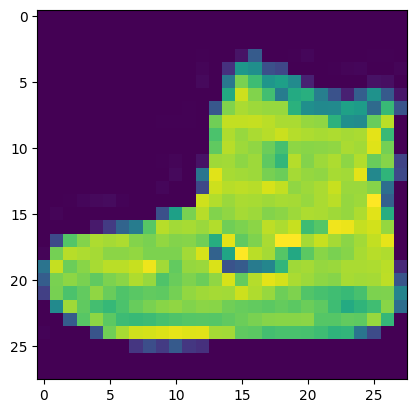

In [76]:
# TODO
plt.imshow(x_train[0])

### TODO 2.1
We reuse `show_img` function to display the data/label/prediction.

1. Create image plotting function which should take arguments as x , title and bot.
    1. The function should display the tensor (i.e your argument 'x') as an image using `imshow`.
    1. we have to remove the axis of images to remove we use the `xticks` and `yticks` methods, respectively. ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html))
    1. Now that we removed the axis our function should now label using `xlabel` and take argument as bot. ([Reference_link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html))
        

HINT: This is a copied excerpt for `imshow` argument:
> X &nbsp;&nbsp;&nbsp;&nbsp; &nbsp; array-like or PIL image <br/>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        The image data. Supported array shapes are:
>
> (M, N): an image with scalar data. The values are mapped to colors using normalization and a colormap. See parameters norm, cmap, vmin, vmax.<br/>
> (M, N, 3): an image with RGB values (0-1 float or 0-255 int).<br/>
> (M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.

In [79]:
# TODO: create image plot function
def show_img(x, title="", bot=""):
    plt.imshow(x.squeeze())
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(bot, fontsize=8)
    plt.title(title, fontsize=10)
    plt.show()





Now that we have created a image plotting function above lets plot our images from "x_train" tensor, You can also refer to previous lab **TODO 2.2**
### TODO 2.2

Let us observe what images and labels are in the training dataset. Follow the instructions to reproduce the provided output images.
1. using `figure` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)),create a Matplotlib figure with a specified size of (10, 5).
1. write a for loop which take range of 10 values.
2. using `subplot` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)) mention the number of rows your images should be displayed for example below output show 2 rows and 5 columns and another argument as i+1
3. Lets use the `show_img` function we have created and give 3 arguments, 1st argument is every element of x_train and and the second is title of each image is set to the corresponding label from the `s_labels` list and the index of the label in "y_train".
4. Exit the loop adjust the subplots to fit the figure size using `tight_layout` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html)) function .


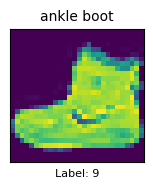

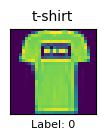

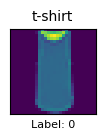

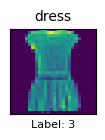

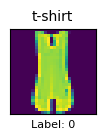

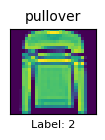

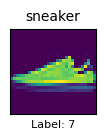

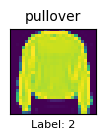

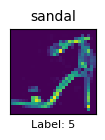

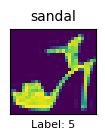

In [84]:
# TODO: plot first 10 images using subplot
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    show_img(x_train[i], title=s_labels[y_train[i]], bot=f"Label: {y_train[i]}")




In [21]:
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

## LeNet

We can replicate LeNet by using Keras as the image below.
<img src="https://d2l.ai/_images/lenet.svg" width=900 />



### TODO 3

1. Looking the figure above, complete the `lenet` architecture

In [24]:
lenet = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1), padding="same"),
    layers.AveragePooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'),
    layers.AveragePooling2D(pool_size=(2,2)),

    layers.Flatten(),

    layers.Dense(120, activation='relu'),

    layers.Dense(84, activation='relu'),

    layers.Dense(10, activation='softmax')
])

lenet.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

## AlexNet

<img src="https://miro.medium.com/max/960/0*pJ3o_2zTTNnixhKH.png" width=800 />

The original AlexNet can be implemented with Keras as below. Please review this to understand the implementation.

In [43]:
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(filters=28, kernel_size=(5,5), strides=1, activation='relu', input_shape=(28,28,1)), # Changed input_shape to (28, 28, 1)
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Second Convolutional Block
    layers.Conv2D(filters=28, kernel_size=(3,3), strides=1, activation='relu', padding='same'), # Changed strides to 1 and added padding
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Third Convolutional Block
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'), # Added padding
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), # Added padding
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Flatten the feature maps for Fully Connected Layers
    layers.Flatten(),

    # Fully Connected Layers with Dropout
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer (10 classes for classification)
    layers.Dense(10, activation='softmax')
])

# Reassign alexnet to the modified model
alexnet = model

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_134 (Conv2D)                  │ (None, 24, 24, 28)          │             728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 12, 12, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_135 (Conv2D)                  │ (None, 12, 12, 28)          │           7,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 6, 6, 28)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_136 (Conv2D)                  │ (None, 6, 6, 32)            │           8,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_137 (Conv2D)                  │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,854 (561.93 KB)

 Trainable params: 143,854 (561.93 KB)

 Non-trainable params: 0 (0.00 B)

The original AlexNet above requires a larger image than Fashion MNIST, so let us shrink the AlexNet as below to play with it.
It was designed to process images of size 224x224, while the images in the Fashion MNIST dataset are only 28x28. This means that the original AlexNet cannot be directly used to classify images in the Fashion MNIST dataset.



### TODO 4


<img src="https://webpages.charlotte.edu/mlee173/teach/ml/images/class/AIDL-Lab7-AlexNet.jpg" width=700 />
1. Looking the figure above, complete the `alexnet` architecture

In [28]:
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(filters=28, kernel_size=(5,5), strides=1, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Second Convolutional Block
    layers.Conv2D(filters=28, kernel_size=(3,3), strides=1, activation='relu', padding='same'), # Changed strides to 1 and added padding
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Third Convolutional Block
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'), # Added padding
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), # Added padding
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # Flatten the feature maps for Fully Connected Layers
    layers.Flatten(),

    # Fully Connected Layers with Dropout
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer (10 classes for classification)
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 28)          │             728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 28)          │           7,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 28)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 6, 6, 32)            │           8,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,854 (561.93 KB)

 Trainable params: 143,854 (561.93 KB)

 Non-trainable params: 0 (0.00 B)

## VGG

<img src="https://d2l.ai/_images/vgg.svg" width=700 />

The following `vgg_block` implements the VGG block in the above image. When `input_shape` is given, it creates the first `Conv2D` with the input shape info.

In [29]:

def vgg_block(num_convs, num_channels, input_shape=None):
    blk = keras.Sequential()

    i_shape = {'input_shape': input_shape} if input_shape is not None else {}
    for i in range(num_convs):
        blk.add(
            layers.Conv2D(num_channels, kernel_size=3,
                          padding='same', activation='relu',
                          **i_shape))
        i_shape = {}
    blk.add(layers.MaxPool2D(pool_size=2, strides=2))
    return blk

In [30]:
vgg11 = keras.Sequential()
# VGG blocks
vgg11.add(vgg_block(1, 64, input_shape=(224,224,3)))
vgg11.add(vgg_block(1, 128))
vgg11.add(vgg_block(2, 256))
vgg11.add(vgg_block(2, 512))
vgg11.add(vgg_block(2, 512))
# Dense layers
vgg11.add(layers.Flatten())
vgg11.add(layers.Dense(4096, activation='relu'))
vgg11.add(layers.Dropout(0.5))
vgg11.add(layers.Dense(4096, activation='relu'))
vgg11.add(layers.Dropout(0.5))
vgg11.add(layers.Dense(10))

vgg11.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 112, 112, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 28, 28, 256)         │         885,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_9 (Sequential)            │ (None, 14, 14, 512)         │       3,539,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_10 (Sequential)           │ (None, 7, 7, 512)           │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,807,306 (491.36 MB)

 Trainable params: 128,807,306 (491.36 MB)

 Non-trainable params: 0 (0.00 B)

Shrinking the VGG network means reducing the number of layers and/or filters in each layer to create a smaller version of the original network. This is necessary because the input images in Fashion MNIST are smaller (28x28 pixels) than the original VGG network's input images (224x224 pixels). A smaller network can be effective for image classification on smaller images while also being faster to train and use. The smaller VGG network requires fewer parameters and computations because it has fewer layers and filters, making it faster to train and use than the original network.

### TODO 5
<img src="https://webpages.charlotte.edu/mlee173/teach/ml/images/class/AIDL-Lab7-VGG.png" width=1000 />

1. Looking the figure above, complete the `vgg` architecture

In [35]:
vgg = keras.Sequential()

# VGG Blocks
vgg.add(vgg_block(1, 28, input_shape=(28,28,1)))  # Block 1: 1 Conv layer, 28 filters
vgg.add(vgg_block(1, 28))  # Block 2: 1 Conv layer, 28 filters
vgg.add(vgg_block(2, 32))  # Block 3: 2 Conv layers, 32 filters
vgg.add(vgg_block(2, 64))  # Block 4: 2 Conv layers, 64 filters

# Flatten for Fully Connected Layers
vgg.add(layers.Flatten())  # Converts feature maps to a vector

# Fully Connected (Dense) Layers with Dropout
vgg.add(layers.Dense(128, activation='relu'))
vgg.add(layers.Dropout(0.5))
vgg.add(layers.Dense(128, activation='relu'))
vgg.add(layers.Dropout(0.5))

# Output Layer for Classification (10 classes)
vgg.add(layers.Dense(10, activation='softmax'))

# Print model summary
vgg.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_33 (Sequential)           │ (None, 14, 14, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_34 (Sequential)           │ (None, 7, 7, 28)            │           7,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_35 (Sequential)           │ (None, 3, 3, 32)            │          17,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_36 (Sequential)           │ (None, 1, 1, 64)            │          55,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,254 (415.05 KB)

 Trainable params: 106,254 (415.05 KB)

 Non-trainable params: 0 (0.00 B)

## Inception

<img src="https://d2l.ai/_images/inception-full-90.svg" width=700 />

Inception network contains inception blocks as the above image. Let us define Inception class to build the network.

In [36]:
class Inception(Model):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4):
        super().__init__()
        self.b1_1 = layers.Conv2D(c1, 1, activation='relu')
        self.b2_1 = layers.Conv2D(c2[0], 1, activation='relu')
        self.b2_2 = layers.Conv2D(c2[1], 3, padding='same',
                                           activation='relu')
        self.b3_1 = layers.Conv2D(c3[0], 1, activation='relu')
        self.b3_2 = layers.Conv2D(c3[1], 5, padding='same',
                                           activation='relu')
        self.b4_1 = layers.MaxPool2D(3, 1, padding='same')
        self.b4_2 = layers.Conv2D(c4, 1, activation='relu')

    def call(self, x):
        b1 = self.b1_1(x)
        b2 = self.b2_2(self.b2_1(x))
        b3 = self.b3_2(self.b3_1(x))
        b4 = self.b4_2(self.b4_1(x))
        return layers.Concatenate()([b1, b2, b3, b4])


This following codes break the network into Conv-MaxPool or Inception-MaxPool groups to assemble them later. Follow the codes and ask questions if anything does not make sense.

In [37]:
b1 = keras.Sequential([
            layers.Conv2D(64, 7, strides=2, padding='same',
                          activation='relu', input_shape=(224,224,3)),
            layers.MaxPool2D(pool_size=3, strides=2,
                          padding='same')])

b2 = keras.Sequential([
        layers.Conv2D(64, 1, activation='relu'),
        layers.Conv2D(192, 3, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

b3 = keras.Sequential([
        Inception(64, (96, 128), (16, 32), 32),
        Inception(128, (128, 192), (32, 96), 64),
        layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

b4 = keras.Sequential([
        Inception(192, (96, 208), (16, 48), 64),
        Inception(160, (112, 224), (24, 64), 64),
        Inception(128, (128, 256), (24, 64), 64),
        Inception(112, (144, 288), (32, 64), 64),
        Inception(256, (160, 320), (32, 128), 128),
        layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

b5 = keras.Sequential([
        Inception(256, (160, 320), (32, 128), 128),
        Inception(384, (192, 384), (48, 128), 128),
        layers.GlobalAvgPool2D(),
        layers.Flatten()])


inception = keras.Sequential([b1, b2, b3, b4, b5, layers.Dense(10)])
inception.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_37 (Sequential)           │ (None, 56, 56, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_38 (Sequential)           │ (None, 28, 28, 192)         │         114,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_39 (Sequential)           │ (None, 14, 14, 480)         │         552,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_40 (Sequential)           │ (None, 7, 7, 832)           │       2,809,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_41 (Sequential)           │ (None, 1024)                │       2,487,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,983,802 (22.83 MB)

 Trainable params: 5,983,802 (22.83 MB)

 Non-trainable params: 0 (0.00 B)

## ResNet

<!-- img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*zbDxCB-0QDAc4oUGVtg3xw.png" width=900 /-->

<img src="https://d2l.ai/_images/resnet18-90.svg" width=900 />


Last, we are implementing the ResNet. Similar to Inception class, we first define the Residual block. This implementation referenced [ResNet Code by Keras Team](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet_common.py).  

In [38]:
class Residual(keras.Model):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = layers.Conv2D(num_channels, padding='same',
                                            kernel_size=3, strides=strides)
        self.conv2 = layers.Conv2D(num_channels, kernel_size=3,
                                            padding='same')
        self.conv3 = None
        if use_1x1conv:
            self.conv3 = layers.Conv2D(num_channels, kernel_size=1,
                                                strides=strides)
        self.bn1 = layers.BatchNormalization()
        self.bn2 = layers.BatchNormalization()

    def call(self, X):
        Y = keras.activations.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3 is not None:
            X = self.conv3(X)
        Y += X
        return keras.activations.relu(Y)

After the Conv-BN-MaxPool block, we add the 8 residual blocks followed by GlobalAvgPool and Dense layer. Read the codes and ask questions if it is not clear. You should be comfortable of reading and writing this kind of codes for your future DL applications.

In [39]:
# ResNet-18
resnet = keras.Sequential([
            layers.Conv2D(64, kernel_size=7, strides=2,
                          padding='same', input_shape=(224,224,3)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.MaxPool2D(pool_size=3, strides=2,padding='same')])

resnet.add(Residual(64))
resnet.add(Residual(64))
resnet.add(Residual(128, use_1x1conv=True, strides=2))
resnet.add(Residual(128))
resnet.add(Residual(256, use_1x1conv=True, strides=2))
resnet.add(Residual(256))
resnet.add(Residual(512, use_1x1conv=True, strides=2))
resnet.add(Residual(512))
resnet.add(layers.GlobalAvgPool2D())
resnet.add(layers.Dense(10))

resnet.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_114 (Conv2D)                  │ (None, 112, 112, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual (Residual)                  │ (None, 56, 56, 64)          │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_1 (Residual)                │ (None, 56, 56, 64)          │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_2 (Residual)                │ (None, 28, 28, 128)         │         230,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_3 (Residual)                │ (None, 28, 28, 128)         │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_4 (Residual)                │ (None, 14, 14, 256)         │         920,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_5 (Residual)                │ (None, 14, 14, 256)         │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_6 (Residual)                │ (None, 7, 7, 512)           │       3,675,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_7 (Residual)                │ (None, 7, 7, 512)           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,192,458 (42.70 MB)

 Trainable params: 11,184,650 (42.67 MB)

 Non-trainable params: 7,808 (30.50 KB)

## Training Models

Data is ready and the models are as well. Now we follow the routine to train the models and evaluate the performance.

### TODO 6
1. Using `compile`, prepare your **lenet** model to have "Adam" as an `optimizer`, have a `loss` function to be "SparseCategoricalCrossentropy" also it should take argument as(from_logits=True) and `metrics` as "accuracy".
2. Repeat the above step for **alexnet**
3. Repeat the above step for **vgg**

In [45]:
# TODO: compile with three metrics
lenet.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

alexnet.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgg.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])











### TODO 7
1. Using `fit`, train the **lenet** model with training data (`x_train` and `y_train`). Train the model for 10 epochs, and "validation_data" be a tuple of test dataset.
2. Repeat the above step for **alexnet**
3. Repeat the above step for **VGG**

<font color='red' style='bold'>NOTE: this code runs for a long time. Be sure to run in colab or on GPU. </font>



In [41]:
# TODO: train
history_lenet = lenet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))




Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7155 - loss: 0.7767 - val_accuracy: 0.8428 - val_loss: 0.4368
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8535 - loss: 0.4006 - val_accuracy: 0.8552 - val_loss: 0.3975
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8754 - loss: 0.3425 - val_accuracy: 0.8805 - val_loss: 0.3282
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8887 - loss: 0.3027 - val_accuracy: 0.8803 - val_loss: 0.3260
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8982 - loss: 0.2765 - val_accuracy: 0.8882 - val_loss: 0.3068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9040 - loss: 0.2586 - val_accuracy: 0.8997 - val_loss: 0.2790
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9112 - loss: 0.2377 - val_accuracy: 0.8969 - val_loss: 0.2864
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9162 - loss: 0.2264 - val_ac

In [46]:
history_alexnet = alexnet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))




Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6318 - loss: 0.9731 - val_accuracy: 0.8377 - val_loss: 0.4347
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8426 - loss: 0.4405 - val_accuracy: 0.8592 - val_loss: 0.3782
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8720 - loss: 0.3603 - val_accuracy: 0.8785 - val_loss: 0.3214
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8859 - loss: 0.3180 - val_accuracy: 0.8940 - val_loss: 0.3013
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8922 - loss: 0.2964 - val_accuracy: 0.8891 - val_loss: 0.3068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8993 - loss: 0.2827 - val_accuracy: 0.8966 - val_loss: 0.2842
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9059 - loss: 0.2624 - val_accuracy: 0.8980 - val_loss: 0.2785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9089 - loss: 0.2527 - val_acc

In [47]:
history_vgg = vgg.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.6198 - loss: 1.0071 - val_accuracy: 0.8450 - val_loss: 0.4217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8533 - loss: 0.4231 - val_accuracy: 0.8769 - val_loss: 0.3392
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8786 - loss: 0.3467 - val_accuracy: 0.8867 - val_loss: 0.3179
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8928 - loss: 0.3096 - val_accuracy: 0.8923 - val_loss: 0.2954
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9025 - loss: 0.2799 - val_accuracy: 0.8992 - val_loss: 0.2801
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9072 - loss: 0.2597 - val_accuracy: 0.9025 - val_loss: 0.2729
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9164 - loss: 0.2379 - val_accuracy: 0.9028 - val_loss: 0.2737
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9164 - loss: 0.2368


We have Created `plot_learning` function that plots the training and validation loss learning curve using the `history` argument.

In [48]:
def plot_learning(history, tgt='loss', val_tgt='val_loss', ylab='error'):
    plt.plot(history.history[tgt], label=tgt)
    plt.plot(history.history[val_tgt], label=val_tgt)
    plt.xlabel('Epoch')
    plt.ylabel(ylab)
    plt.legend()

In [49]:
history = {'lenet': history_lenet, 'alexnet': history_alexnet, 'vgg': history_vgg}

### TODO 8
1.Write a for loop to plot the three models using the `plot_learning`function.
  * Hint: use the above-mentioned history list variable that we created.

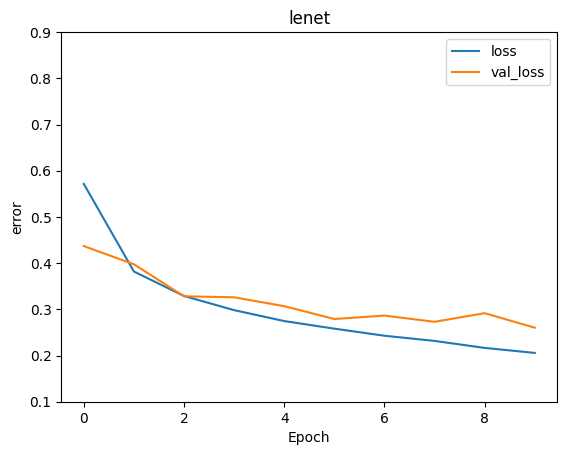

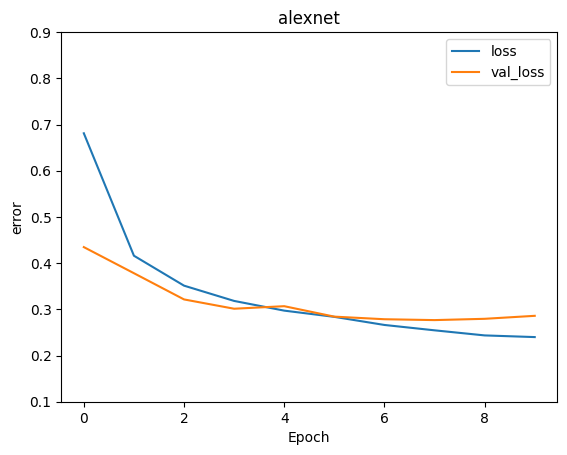

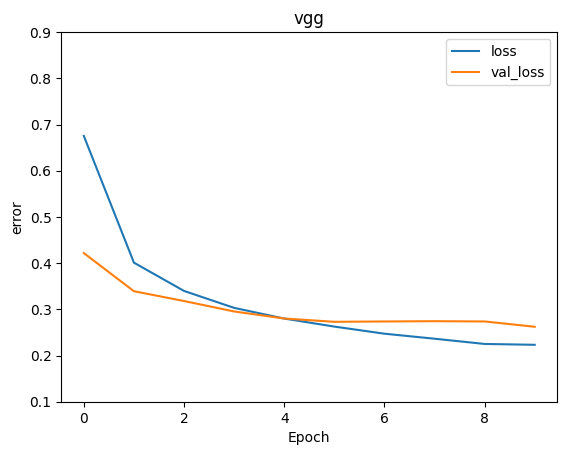

In [51]:

for k, h in history.items():
    plt.figure()
    # TODO: plot_learning
    plot_learning(h)

    plt.title(k)
    plt.ylim([0.1, 0.9])

### TODO 8.1
1. Refering to TODO8, write a for loop to run `plot_learning` to plot the accuracy history by giving additional arguments such as 'accuracy', 'val_accuracy' and  'Accuracy'/
1. Set `ylim` of each figure to [0.65, 0.93].

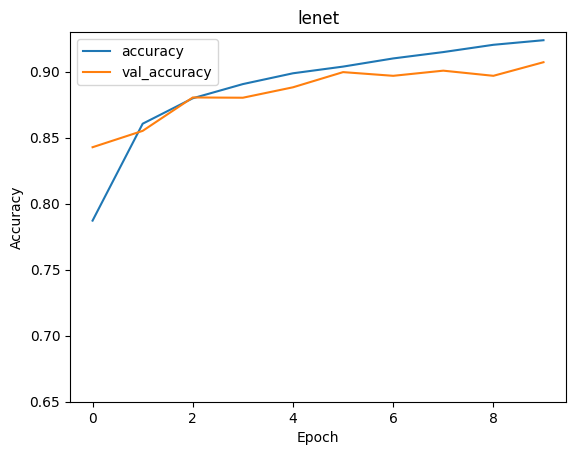

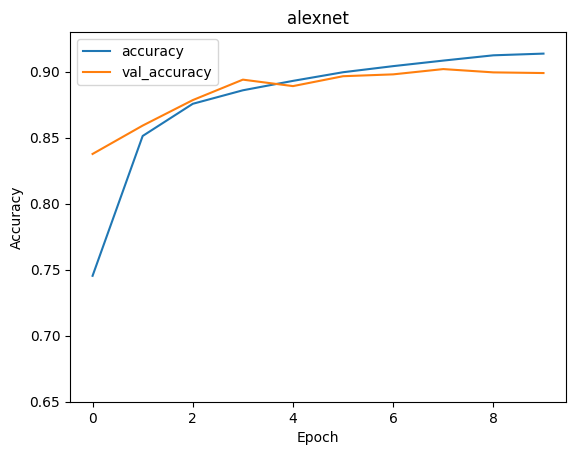

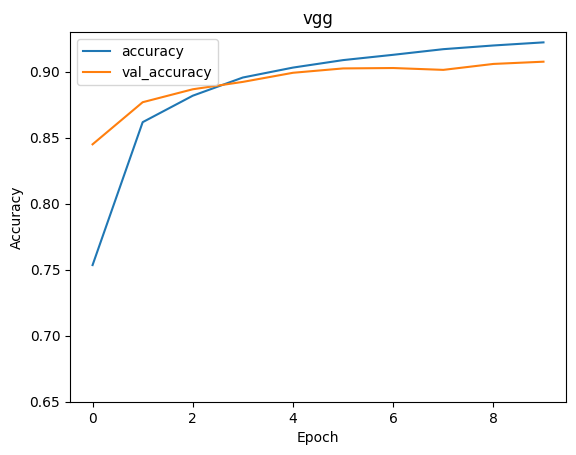

In [52]:
for k, h in history.items():
    plt.figure()
    # TODO: plot_learning
    plot_learning(h, 'accuracy', 'val_accuracy', 'Accuracy')

    plt.title(k)
    plt.ylim([0.65, 0.93])






### TODO 9
1. `evaluate` three model on test data (`x_test` and `y_test`).

In [53]:
# TODO:
lenet.evaluate(x_test, y_test)
alexnet.evaluate(x_test, y_test)
vgg.evaluate(x_test, y_test)




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9050 - loss: 0.2677
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8995 - loss: 0.2884
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9068 - loss: 0.2773


[0.26223060488700867, 0.9075999855995178]

In many cases, where the size of the array is too large, it takes too much time to find the maximum elements from them. For this purpose, the numpy module of Python provides a function called `numpy.argmax()`. This function returns indices of the maximum values are returned along with the specified axis.
### TODO 9.1
1. predict the **lenet** model on test data (`x_test`) using `predict` function.
2. Pass the output of this function to the `np.argmax` function.
3. Repeat the same process for **VGG** and **alexnet**

In [55]:
# TODO:
y_pred = lenet.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [56]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

### TODO 9.2
And finally lets plot the first 10 images of **lenet** model y_pred using subplot
1. Referring TODO 2.2, show the first 10 images with both labels and predictions.
  * HINT: `show_img` has `bot` and `title` arguments for you to use for predictions and labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


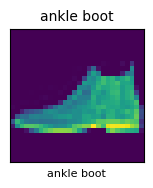

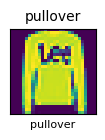

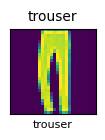

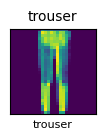

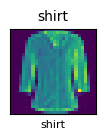

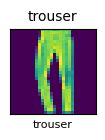

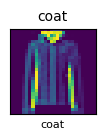

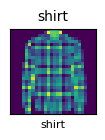

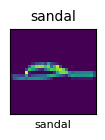

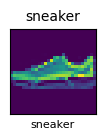

<Figure size 640x480 with 0 Axes>

In [85]:
# TODO: plot first 10 images using subplot
y_pred = model.predict(x_test[:10])  # Predict first 10 images
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert softmax to class index
plt.figure(figsize=(10,5))


# Loop through the first 10 images
for i in range(10):
    plt.subplot(2, 5, i+1)
    show_img(x_test[i], title=s_labels[y_pred_labels[i]], bot=s_labels[y_test[i]])

# Adjust layout to fit images
plt.tight_layout()



### TODO 9.3

Repeat the visualizations of sample predictions with **AlexNet** and **VGG**.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


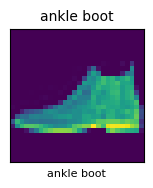

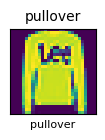

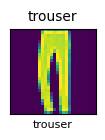

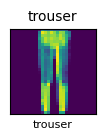

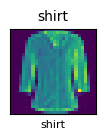

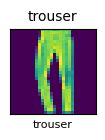

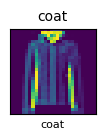

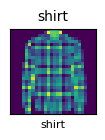

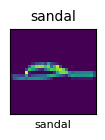

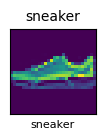

<Figure size 640x480 with 0 Axes>

In [86]:
y_pred = alexnet.predict(x_test[:10])
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert softmax to class index
plt.figure(figsize=(10,5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  show_img(x_test[i], title=s_labels[y_pred_labels[i]], bot=s_labels[y_test[i]])
  plt.tight_layout()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


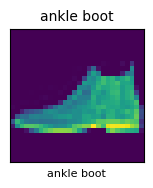

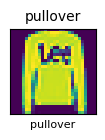

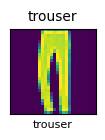

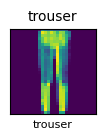

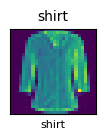

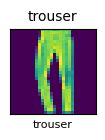

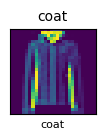

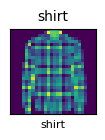

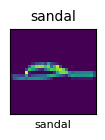

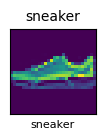

In [87]:
y_pred = vgg.predict(x_test[:10])
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert softmax to class index
plt.figure(figsize=(10,5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  show_img(x_test[i], title=s_labels[y_pred_labels[i]], bot=s_labels[y_test[i]])